In [1]:
from pandas import read_csv

import Bowtie as bow

# The geometric factor
---
<span style="font-size:1.5em;">
The geometric factor, often denoted as $G \delta E$ [cm$^{2}$ sr MeV], is a physical quantity that characterizes a particle instrument's response to a charged particle distribution. Knowledge of the geometric factor is required to convert particle counts (directly measured quantity) to the physical unit of intensity (estimated quantity).
    
The geometric factor is often extremely challenging - sometimes even impossible - to analytically calculate, and hence it is often determined either experimentally or numerically using e.g., Monte Carlo simulations.

The result of bowtie analysis is the geometric factor and an effective energy for an energy channel.
</span>

# An example on how to apply the Bowtie package for your instrument's response functions:
---
<span style="font-size:1.5em;">
    
In this example notebook we read in the electron response functions for the Side 0 of BepiColombo / SIXS-P instrument.
    
We walk through on how to initialize and use the Bowtie class to run bowtie-analysis on response functions for different particle spectra.

Finally we save the result of analysis to a csv table.
</span>

In [2]:
# The input data is given as a csv table. The channel responses must be indexed by incident energy
response_df = read_csv("sixs_side0_electron_responses.csv", index_col="incident_energy")

# Display the dataframe to see that it was read in correctly
display(response_df)

E1   E2   E3   E4   E5   E6   E7
incident_energy                                   
0.010045         0.0  0.0  0.0  0.0  0.0  0.0  0.0
0.010136         0.0  0.0  0.0  0.0  0.0  0.0  0.0
0.010227         0.0  0.0  0.0  0.0  0.0  0.0  0.0
0.010320         0.0  0.0  0.0  0.0  0.0  0.0  0.0
0.010413         0.0  0.0  0.0  0.0  0.0  0.0  0.0
...              ...  ...  ...  ...  ...  ...  ...
193690.970402    0.0  0.0  0.0  0.0  0.0  0.0  0.0
195440.977005    0.0  0.0  0.0  0.0  0.0  0.0  0.0
197206.794997    0.0  0.0  0.0  0.0  0.0  0.0  0.0
198988.567232    0.0  0.0  0.0  0.0  0.0  0.0  0.0
200786.437860    0.0  0.0  0.0  0.0  0.0  0.0  0.0

[1870 rows x 7 columns]

In [3]:
# Initialize the Bowtie object with an energy range (in MeV) and the response data

energy_min = 0.01
energy_max = 50.

bowtie = bow.Bowtie(energy_min=energy_min, energy_max=energy_max, data=response_df)

## About the Bowtie class
---

The `Bowtie` class contains the data that the bowtie analysis is applied on, and the energy range to be considered in the calculations. Its methods make running analysis easy and straighforward. \
`Bowtie`'s methods are:
### .set_energy_range(energy_min, energy_max):

    energy_min : {float} The minimum energy in MeV to consider. 
    energy_max : {float} The maximum energy to consider.

### .bowtie_analysis(channel, spectra, plot):
    
    channel : {str} The channel column name as it appears in the csv file.
    spectra : {Spectra} The Spectra class object, introduced in this package.
    plot : {bool} A boolean switch to produce a plot that visualizes the analysis results.

### bowtie_analysis_full_stack(spectra, plot):
    
Wrapper for `bowtie_analysis()`. Runs the analysis on all channels that appear in the input file.

In [4]:
# Next up initialize a range of spectra, starting from minimum to maximum with an amount of steps

gamma_min = -3.5
gamma_max = -1.5
num_of_spectra = 100

spectra = bow.Spectra(gamma_min=gamma_min, gamma_max=gamma_max, gamma_steps=num_of_spectra)

## About the Spectra class
---
The `Spectra` class contain the range of spectra that are applied on the response function to run bowtie analysis \
`Spectra`'s methods are:
### .set_spectral_indices(gamma_min, gamma_max):
    
    gamma_min : {float} The minimum spectral index to consider in the calculation.
    gamma_max : {float} The maximum spectral index to consider in the calculation.

### .produce_power_law(response_df) :
    
    response_df : The pandas DataFrame that contains the incident energies and respective responses.


In [5]:
# Produces the power law spectra with given spectral indices for the energies 
# in the response dataframe indices.
# The range of power law spectra are stored inside the Spectra object.
spectra.produce_power_law_spectra(response_df)

In [6]:
# The power law spectra are stored as a class variable called "power_law_spectra".
# power_law_spectra is a dictionary, that contains a spectrum for each value of
# spectral index.
# User need necessarily not care about it.
spectra.power_law_spectra

[{'gamma': -3.5,
  'spect': array([1.00000000e-30, 7.45986988e+06, 7.24849281e+06, ...,
         2.93611751e-19, 2.84512635e-19, 2.75695504e-19])},
 {'gamma': -3.4797979797979797,
  'spect': array([1.00000000e-30, 6.79900848e+06, 6.60755759e+06, ...,
         3.75613810e-19, 3.64039569e-19, 3.52821978e-19])},
 {'gamma': -3.45959595959596,
  'spect': array([1.00000000e-30, 6.19669204e+06, 6.02329595e+06, ...,
         4.80518011e-19, 4.65795860e-19, 4.51524767e-19])},
 {'gamma': -3.4393939393939394,
  'spect': array([1.00000000e-30, 5.64773414e+06, 5.49069661e+06, ...,
         6.14720631e-19, 5.95995055e-19, 5.77839897e-19])},
 {'gamma': -3.419191919191919,
  'spect': array([1.00000000e-30, 5.14740779e+06, 5.00519143e+06, ...,
         7.86404351e-19, 7.62587513e-19, 7.39491985e-19])},
 {'gamma': -3.398989898989899,
  'spect': array([1.00000000e-30, 4.69140478e+06, 4.56261619e+06, ...,
         1.00603717e-18, 9.75745871e-19, 9.46366630e-19])},
 {'gamma': -3.378787878787879,
  'spect':

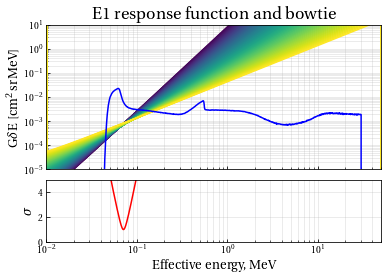

In [7]:
# bowtie_analysis is a class method for a single channel bowtie analysis with the given spectra
# The method takes as an input the channel on which bowtie analysis is applied on, the range of 
# spectra used (contained in the spectra object that we initialized earlier) and a boolean switch
# to produce a plot to visualize the calculation.

channel = "E1"
produce_plot = True

e1_results = bowtie.bowtie_analysis(channel=channel, spectra=spectra, plot=produce_plot)

In [8]:
# The bowtie_analysis()-method returns a dictionary that contains the results of the analysis.
# geometric_factor : {float} The geometric factor G\DeltaE in cm^2 sr MeV
# geometric_factor_errors (absolute) : {dict} with 'gfup' : {float}, and 'gflo' : {float}
# effective_energy : {float} The effective energy in MeV
# fig : {plt.Fig} if plot==True. The figure that visualizes the spectra and the response function
# ax : {tuple(plt.Axes)} if plot==True. The two pairs of axes of the figure.
e1_results

{'geometric_factor': 0.000744084026271278,
 'geometric_factor_errors': {'gfup': 4.407576153642298e-05,
  'gflo': 3.07655324791197e-05},
 'effective_energy': 0.0713699882077903,
 'fig': <Figure size 432x288 with 2 Axes>,
 'axes': (<Axes: title={'center': 'E1 response function and bowtie'}, ylabel='G$\\delta$E [${\\rm cm}^2\\,{\\rm sr}\\,{\\rm MeV}$]'>,
  <Axes: xlabel='Effective energy, MeV', ylabel='$\\sigma$'>)}

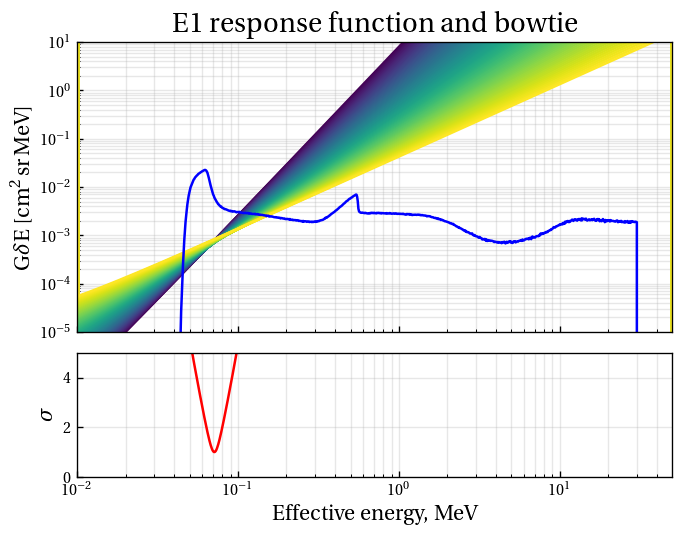

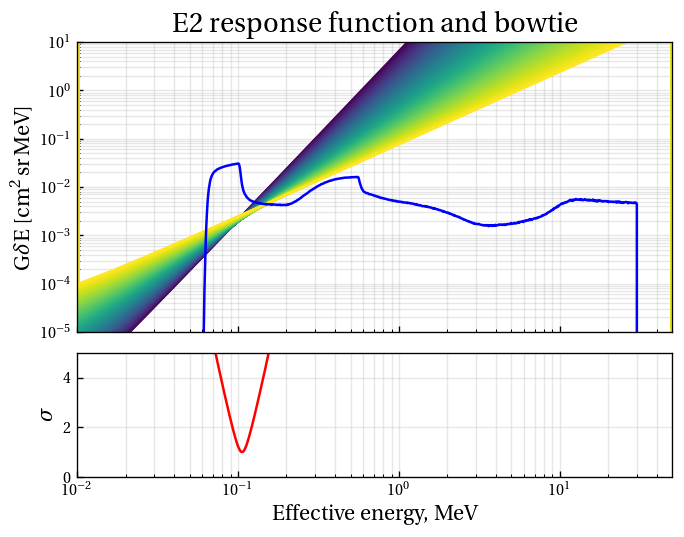

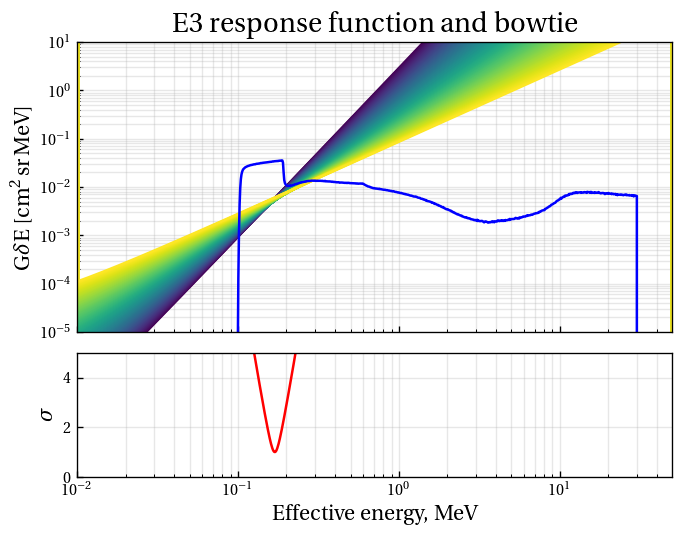

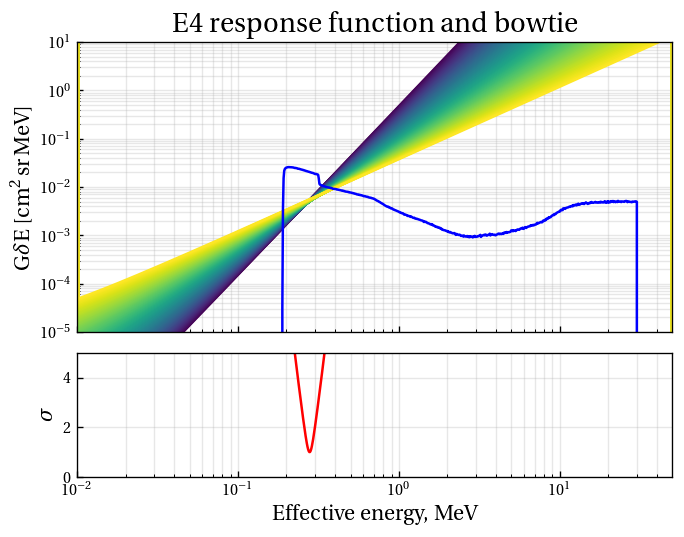

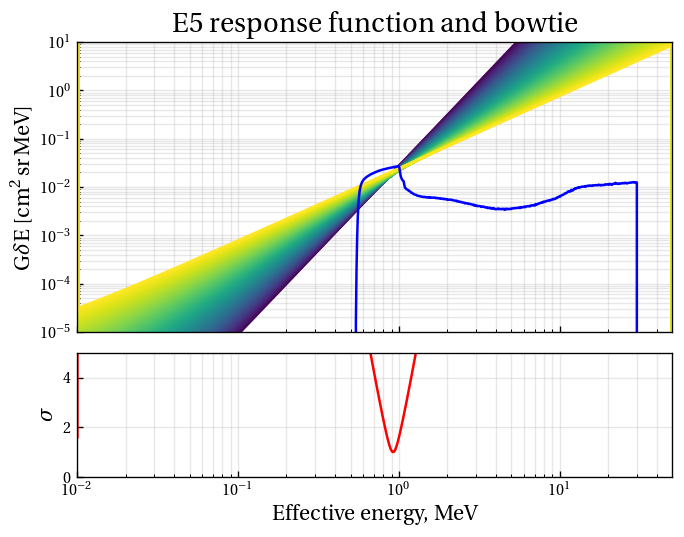

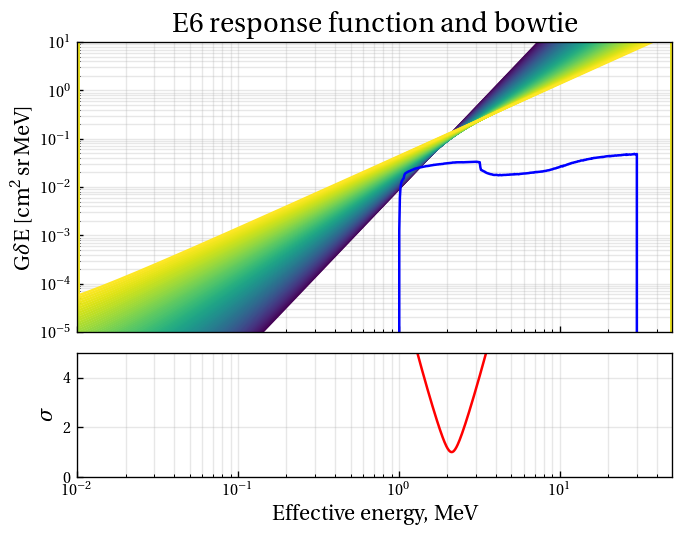

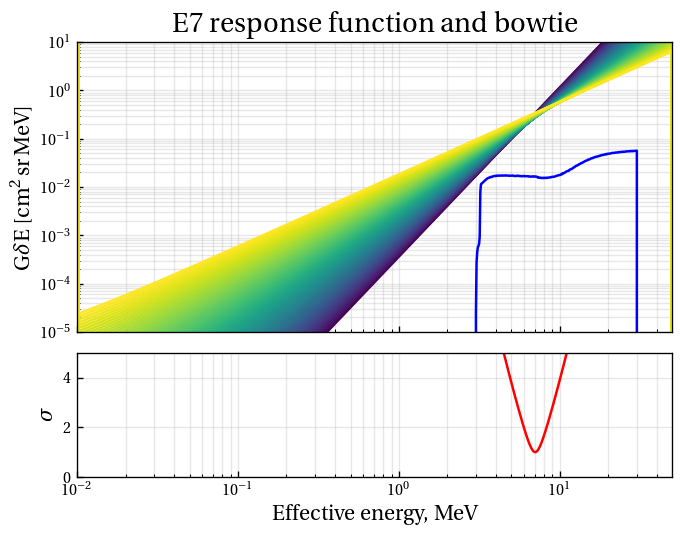

In [9]:
# The bowtie_analysis_full_stack()-method is a wrapper for the bowtie_analysis()-method. It 
# runs bowtie analysis automatically on all the columns in the csv table that was fed to the 
# Bowtie class.
# The method returns a list that contains a dictionary of results described above for each channel.

all_channels_results = bowtie.bowtie_analysis_full_stack(spectra=spectra, plot=True)